<a href="https://www.kaggle.com/code/sugataghosh/implementing-logistic-regression-from-scratch">Kaggle link - Logistic regression from scratch</a>

In [67]:
# Importing libraries
import time, psutil, os, math
from tqdm.contrib import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split

In [68]:
# Runtime and memory usage
start = time.time()
process = psutil.Process(os.getpid())

In [69]:
# Loading the data
data = pd.read_csv('datasets/higgs-boson/training.csv')
print(pd.Series({"Memory usage": "{:.4f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())
data.head()

Memory usage       62.9426 MB
Dataset shape    (250000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [70]:
def logistic(x):
    return 1/(1 + np.exp(-x))

x, x_arr = 0, np.array([-5, -1, 0 ,1, 5])
print(logistic(x))
print(logistic(x_arr))

0.5
[0.00669285 0.26894142 0.5        0.73105858 0.99330715]


Text(0.5, 1.0, 'Standard sigmoid function')

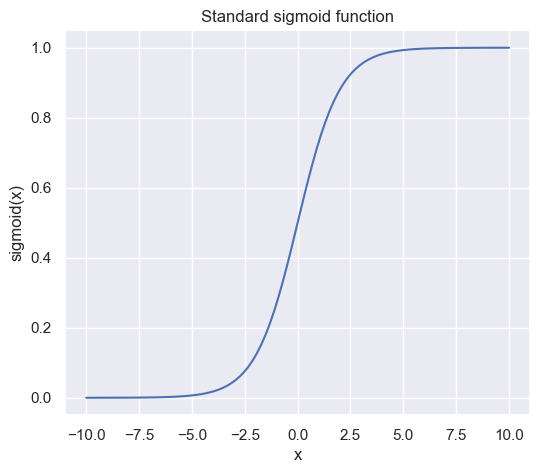

In [71]:
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(6, 5))
plt.plot(x, logistic(x))
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Standard sigmoid function")

In [72]:
def log_loss(y, y_pred):
    return -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

y, y_pred = 0, 0.6
print("Log Loss: ", log_loss(y, y_pred))

y, y_pred = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print("Log Loss: ", log_loss(y, y_pred))

Log Loss:  0.916290731874155
Log Loss:  [0.51082562 0.51082562 0.28768207]


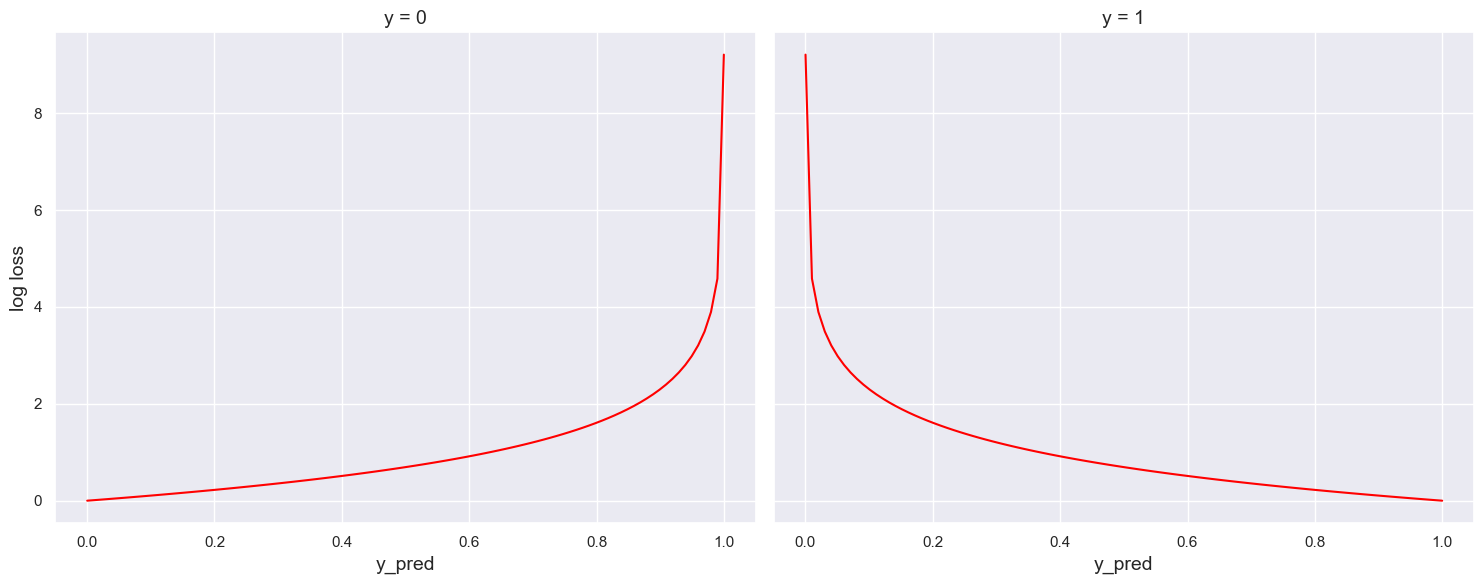

In [73]:
# Log loss for y = 0 and y = 1
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_pred = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_pred, log_loss(0, y_pred), color = 'red')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_pred", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)
ax[1].plot(y_pred, log_loss(1, y_pred), color = 'red')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_pred", fontsize = 14)
plt.tight_layout()
plt.show()

In [74]:
def cost_func(y, y_pred):
    '''
    Cost function is the mean log_loss over all observations.
    '''
    return np.mean(log_loss(y, y_pred))

y, y_dash = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print(f"cost_func({y}, {y_dash}) = {cost_func(y, y_dash)}")

cost_func([0 1 0], [0.4  0.6  0.25]) = 0.43644443999458743


In [75]:
# Function to compute cost function in terms of model parameters - using vectorization
def cost_logreg_vec(X, y, w, b):
    """
    Computes the cost function, given data and model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash 
    """
    return cost_func(y, logistic(np.dot(X, w) + b))

[Text(0.5, 0, 'w'), Text(0.5, 0.5, 'b')]

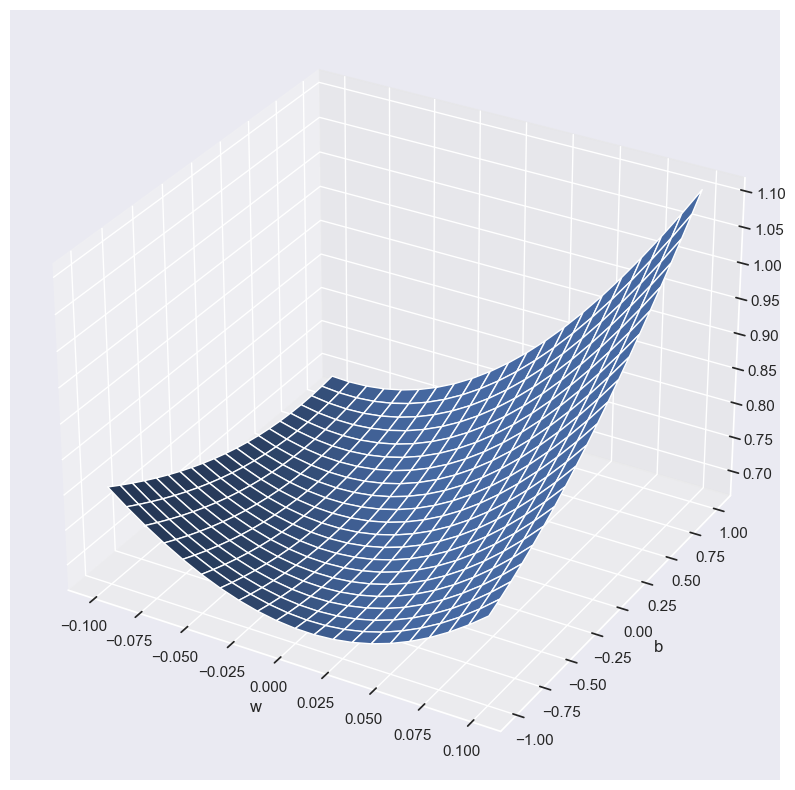

In [76]:
# Plotting the cost function against model parameters
from mpl_toolkits.mplot3d import Axes3D
w, b = np.meshgrid(np.linspace(-0.1, 0.1, 21), np.linspace(-1, 1, 21))
X = np.array([1.56, 0.76 , 0.08, 9.71, 4.65, 4.35, 7.34, 0.91, 9.82, 9.05]).reshape((10, 1))
y = np.array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0])
cost = np.array([[cost_logreg_vec(X, y, np.array([w0]), b0) for b0 in b[:, 0]] for w0 in w[0]])
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
ax.plot_surface(w, b, cost)
ax.set(xlabel = "w", ylabel = "b")

In [77]:
# Function to compute gradients of the cost function with respect to model parameters - using for loops
def grad_logreg(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    y_pred = logistic(np.dot(X, w) + b)
    m = X.shape[0]
    dL_dw = np.dot(y_pred - y, X)/m
    dL_db = np.mean(y_pred - y)
    return dL_dw, dL_db
  
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"grad_logreg(X = {X}, y = {y}, w = {w}, b = {b}) = {grad_logreg(X, y, w, b)}")

grad_logreg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), 0.4999916492890759)


In [78]:
# Gradient descent algorithm for logistic regression
def grad_desc(X, y, w, b, alpha, n_iter, show_cost = True, show_params = False): 
    """
    Implements batch gradient descent algorithm to learn and update model parameters
    with prespecified number of interations and learning rate
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): true values of target (0 or 1)
      w (array_like, shape (n,)): initial value of weight parameters
      b (scalar)                : initial value of bias parameter
      cost_func                 : function to compute cost
      grad_func                 : function to compute gradients of cost with respect to model parameters
      alpha (float)             : learning rate
      n_iter (int)              : number of iterations
    Returns:
      w (array_like, shape (n,)): updated values of weight parameters
      b (scalar)                : updated value of bias parameter
    """
    losses = []
    for i in range(n_iter):
      loss = cost_logreg_vec(X, y, w, b)
      if i % 10 == 0:
        losses.append(loss)
        print("[Iteration: {}] Loss = {}".format(i, loss))
      dL_dw, dL_db = grad_logreg(X, y, w, b)
      w = w - alpha * dL_dw
      b = b - alpha * dL_db
    
    print("Loss = {}, b = {}".format(loss, b))
    return w, b, losses, []
  
X, y, w, b, alpha, n_iter = np.array([[0.1, 0.2], [-0.1, 0.1]]), np.array([1, 0]), np.array([0., 0.]), 0., 0.1, 1000
w_out, b_out, cost_history, params_history = grad_desc(X, y, w, b, alpha, n_iter, show_cost = True, show_params = True)

[Iteration: 0] Loss = 0.6931471805599453
[Iteration: 10] Loss = 0.690034308220073
[Iteration: 20] Loss = 0.6869451826288144
[Iteration: 30] Loss = 0.6838778624716553
[Iteration: 40] Loss = 0.6808311430556849
[Iteration: 50] Loss = 0.6778042587765227
[Iteration: 60] Loss = 0.6747967058100384
[Iteration: 70] Loss = 0.6718081364620718
[Iteration: 80] Loss = 0.6688382962226419
[Iteration: 90] Loss = 0.6658869862670105
[Iteration: 100] Loss = 0.6629540411186927
[Iteration: 110] Loss = 0.6600393153456737
[Iteration: 120] Loss = 0.657142675638068
[Iteration: 130] Loss = 0.6542639960915062
[Iteration: 140] Loss = 0.651403155400053
[Iteration: 150] Loss = 0.6485600351864794
[Iteration: 160] Loss = 0.64573451900991
[Iteration: 170] Loss = 0.6429264917768458
[Iteration: 180] Loss = 0.6401358393923646
[Iteration: 190] Loss = 0.637362448554287
[Iteration: 200] Loss = 0.6346062066324127
[Iteration: 210] Loss = 0.6318670015983487
[Iteration: 220] Loss = 0.6291447219853896
[Iteration: 230] Loss = 0.62

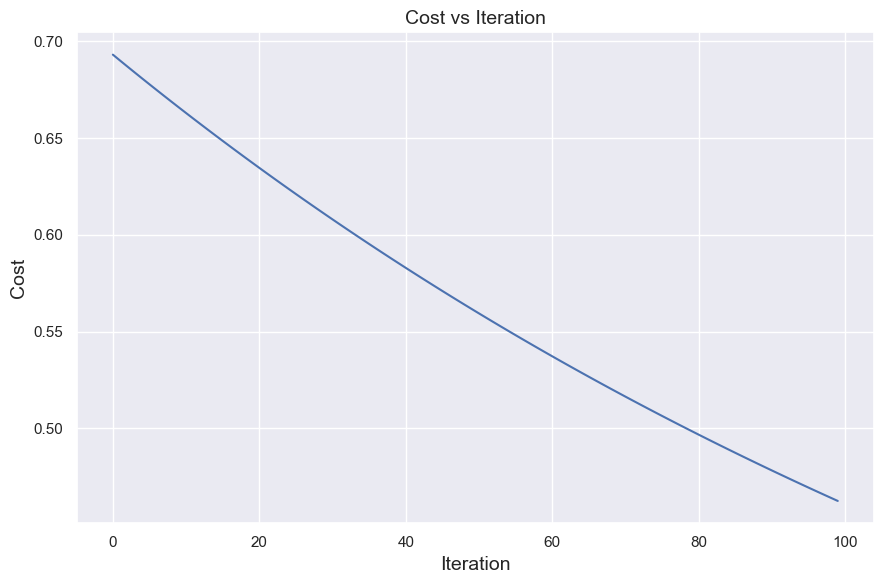

In [79]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

In [80]:
# Data cleanup.
data

data2 = data.drop(['EventId', 'Weight'], axis=1)
data3 = data2.replace(to_replace=-999, value=np.nan)

# encode the label
data_clean = data3.replace({'Label': {'b': 0, 's': 1}})
data = data_clean

C:\Users\Nitin\AppData\Local\Temp\ipykernel_26552\81719164.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean = data3.replace({'Label': {'b': 0, 's': 1}})


In [81]:
data_train, data_test = train_test_split(data_clean , test_size = 0.2, random_state = 40)
data_train

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
207507,331.244,12.870,209.038,46.965,2.160,213.999,-1.161,3.271,29.521,385.115,...,553.696,3,77.983,1.147,-0.461,55.745,-1.013,2.109,208.941,0
67694,117.505,15.931,46.371,174.135,2.250,199.365,-1.239,1.345,46.994,269.099,...,324.164,3,90.903,-0.962,1.642,55.002,1.288,1.105,194.032,1
142304,168.144,98.711,112.317,27.717,2.970,155.379,-0.617,3.123,23.576,140.867,...,232.342,2,36.239,-2.745,1.959,32.465,0.225,-2.405,68.703,0
94158,NaN,82.062,113.440,2.434,NaN,NaN,NaN,2.424,2.434,94.403,...,111.403,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,0
82095,114.636,57.283,76.209,18.421,NaN,NaN,NaN,2.934,28.963,114.053,...,230.268,1,37.584,1.204,-0.882,NaN,NaN,NaN,37.584,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93176,141.551,33.838,74.792,228.908,NaN,NaN,NaN,1.171,31.361,387.370,...,568.375,1,247.163,2.503,2.609,NaN,NaN,NaN,247.163,1
211109,118.798,16.893,71.584,67.850,NaN,NaN,NaN,2.458,3.132,138.132,...,146.699,1,65.179,-0.212,0.150,NaN,NaN,NaN,65.179,1
30727,114.459,50.792,75.545,24.285,3.715,560.291,-1.872,3.024,37.336,284.255,...,310.575,3,96.285,3.113,-0.684,75.421,-0.601,2.470,210.962,0
112859,103.717,47.730,82.369,6.928,NaN,NaN,NaN,2.425,6.928,85.020,...,143.924,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,1


In [82]:
# Columns with missing values with respective proportions
(data.isna().sum()[data.isna().sum() > 0]/len(data)).sort_values()

# Discarding columns with more than 30% missing data
cols_missing_drop = [
    'DER_deltaeta_jet_jet',
    'DER_mass_jet_jet',
    'DER_prodeta_jet_jet',
    'DER_lep_eta_centrality',
    'PRI_jet_subleading_pt',
    'PRI_jet_subleading_eta',
    'PRI_jet_subleading_phi',
    'PRI_jet_leading_pt',
    'PRI_jet_leading_eta',
    'PRI_jet_leading_phi'
]

data_train = data_train.drop(cols_missing_drop, axis=1)
data_test = data_test.drop(cols_missing_drop, axis=1)

In [83]:
# Median imputation
data_train['DER_mass_MMC'] = data_train['DER_mass_MMC'].fillna(data_train['DER_mass_MMC'].median())
data_test['DER_mass_MMC'] = data_test['DER_mass_MMC'].fillna(data_test['DER_mass_MMC'].median())

In [84]:
X_train, y_train = data_train.drop('Label', axis = 1), data_train['Label']
X_test, y_test = data_test.drop('Label', axis = 1), data_test['Label']

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [86]:
# Initial values of the model parameters
w_init = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).astype(float)
b_init = 0

In [87]:
# Learning model parameters using gradient descent algorithm
w_out, b_out, cost_history, params_history = grad_desc(X_train,
                                                       y_train,
                                                       w = w_init, # np.zeros(X_train.shape[1]),
                                                       b = b_init, # 0,
                                                       alpha = 2.45,
                                                       n_iter = 200)

[Iteration: 0] Loss = 0.6931471805599453
[Iteration: 10] Loss = 0.6119756462554057
[Iteration: 20] Loss = 0.6049763624720175
[Iteration: 30] Loss = 0.6018309075348838
[Iteration: 40] Loss = 0.5995299448531158
[Iteration: 50] Loss = 0.5975804284257386
[Iteration: 60] Loss = 0.5958394193755234
[Iteration: 70] Loss = 0.594243059446246
[Iteration: 80] Loss = 0.5927563797738009
[Iteration: 90] Loss = 0.591358112688359
[Iteration: 100] Loss = 0.5900342678851007
[Iteration: 110] Loss = 0.5887749946775549
[Iteration: 120] Loss = 0.5875729441688335
[Iteration: 130] Loss = 0.5864223721108256
[Iteration: 140] Loss = 0.585318623693611
[Iteration: 150] Loss = 0.5842578227056098
[Iteration: 160] Loss = 0.5832366743419201
[Iteration: 170] Loss = 0.5822523338601383
[Iteration: 180] Loss = 0.5813023150562054
[Iteration: 190] Loss = 0.5803844238798209
Loss = 0.5795841734752657, b = -1.4045252446124008


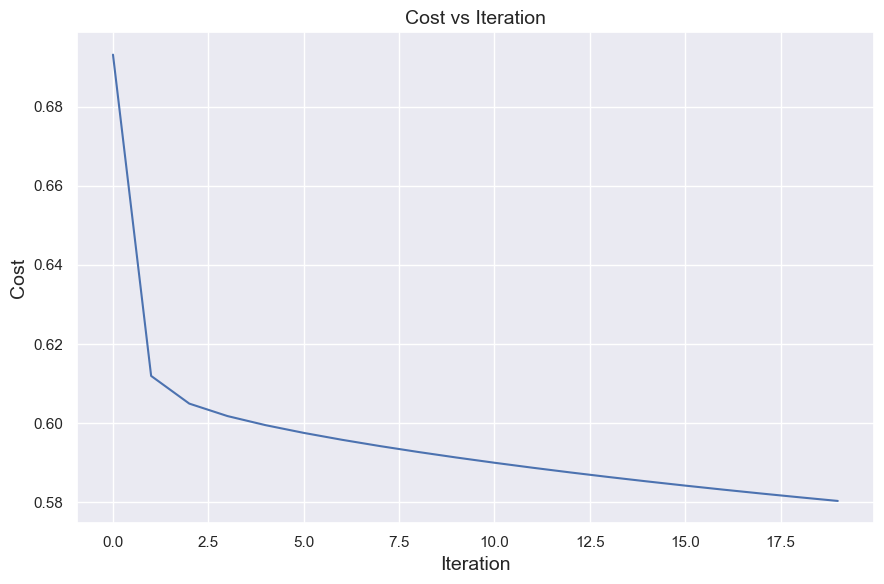

In [88]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

<H3> Evaluation and metrics </H3>

metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred))

In [112]:
import sklearn.metrics as metrics

y_pred = logistic(np.dot(X_test, w_out) + b_out)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.86      0.79     32811
           1       0.59      0.38      0.47     17189

    accuracy                           0.70     50000
   macro avg       0.66      0.62      0.63     50000
weighted avg       0.68      0.70      0.68     50000



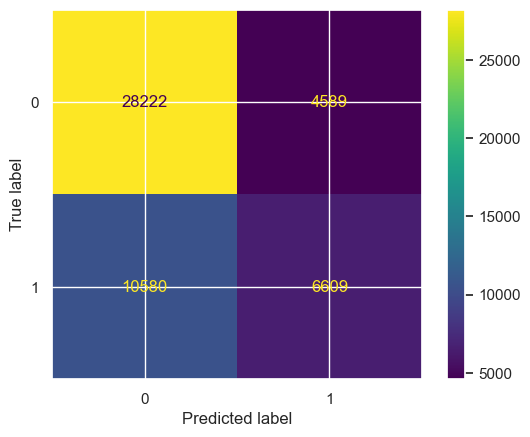

In [116]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
matrix_display.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 0.6223142245479183


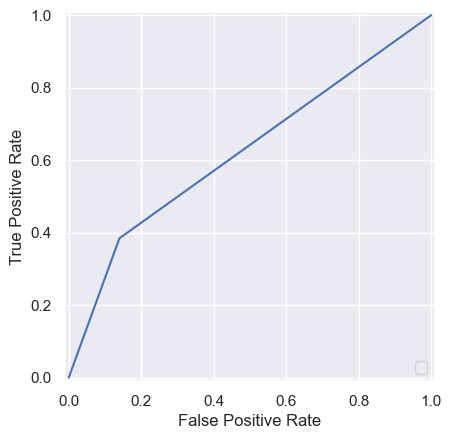

In [117]:
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()